# Support Vector Regression(SVR)

### Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [34]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Dependent & independent variables

In [54]:
X = df.iloc[:, 1:2].values 
y = df.iloc[:, 2:3].values

### Support Vector Regression(SVR) Intuition

<b>Support Vector Regression Support Vector Regression</b>

SVR is derived from SVM. The goal of SVR is to find the optimal plane in space and accurately predict the distribution of data.
<br><br>
Kernel functions are used in SVR. There are four commonly used Kernel functions:
Linear Kernel Function
2. Polynomial Kernel
3. Radial Base Function
4. Sigmoid kernel function

Take this dataset as an example and want to understand the relationship between level and salary <br>
> Assuming that there is a curve relationship between rank and salary, then if you want to determine whether the expected salary of a new employee meets the criteria he says, you can use the annual salary of each employee’s pre-employee company’s job title and rank to establish a polynomial regression. The model makes the decision. <br><br>
> The chart below shows the relationship between salary and salary, and you can see that there is indeed a relationship between the curves.
![](plot_2_4_1.png)

> [Note] Because it is a curve relationship, the Kernel Function part does not consider the linear kernel function (Linear kernel)

<div class="alert alert-danger" role="alert">
   <strong>Exercise!</strong>
</div>
There is a staff member with Level=6.5, claiming that he has an annual salary of 160,000. He hopes to use the support vector regression model to verify whether his words are honest.

### Splitting the dataset into the Training set and Test set

In [55]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

>Since this dataset only has 10 observations, if it is hard to do segmentation training and test samples, then it will not be enough information to build a model. Therefore, it is not recommended to do segmentation training and test samples.

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_s = sc_X.fit_transform(X)
y_s = sc_y.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting SVR to the dataset

> [Note]
There are four commonly used Kernel Functions:
1. linear : Linear kernel
2. ploy : Polynomial Kernel
3. rbf : Radial Base Function
4. sigomid: Sigmoid kernel function

> Because the data is nonlinear, instead of selecting linear to use rbf, rbf is the more commonly used Kernel, and ploy takes a long time to calculate.

### A. Without Feature Scaling, `kernel = 'rbf'`

In [57]:
from sklearn.svm import SVR
regressor_A = SVR(kernel = 'rbf')
regressor_A.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
### B. With Feature Scaling, `kernel = 'rbf'`

In [59]:
from sklearn.svm import SVR
regressor_B = SVR(kernel = 'rbf')
regressor_B.fit(X_s, y_s)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Visualising the Support Vector Regression(SVR)  results (for higher resolution and smoother curve)

#### A. Without Feature Scaling, `kernel = 'rbf'`


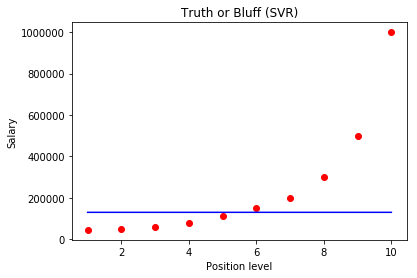

In [60]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_A.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

** Comments :**
 Without Feature Scaling :Model with a very poor fit.

#### B. With Feature Scaling，`kernel = 'rbf'`

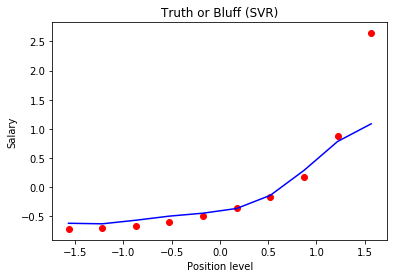

In [61]:
plt.scatter(X_s, y_s, color = 'red')
plt.plot(X_s, regressor_B.predict(X_s), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

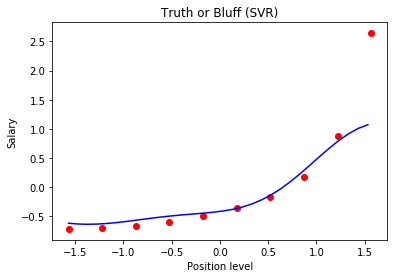

In [62]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_s), max(X_s), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_s, y_s, color = 'red')
plt.plot(X_grid, regressor_B.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Comments -**
It can be seen from the figure that the difference between the actual value and the predicted value is very small, so it can be determined that the SVR application performed well in this group of data.

### Predicting a new result with Support Vector Regression(SVR) 

#### A. Without Feature Scaling, `kernel = 'rbf'`

In [63]:
regressor_A.predict(6.5)

array([130001.55760156])

#### B. With Feature Scaling，`kernel = 'rbf'`

In [64]:
regressor_B.predict(sc_X.transform(np.array([[6.5]])))

array([-0.27861589])

In [65]:
sc_y.inverse_transform( regressor_B.predict(sc_X.transform(np.array([[6.5]]))) )

array([170370.0204065])

> [Note]
1. transform This method specifies that the input to be entered must be np.array
2. regressor_B When building the Model, X does Feature Scaling, so if you want to predict y thrown into the Model X must also go through the same Feature Scaling conversion, and the last y also need to do inverse_transform the predicted y value back Scaling of the original data set.


### **The Conclusion**
<p> SVR model predicted a salary of 170370$ for a Level of 6.5